In [1]:
import models
import ciw
import matplotlib.pyplot as plt

In [2]:
class JSQRouting(ciw.Node):
    def next_node(self, ind):
        """
        Finds the next node according the routing method:
          - We overwrite this, so it now looks at the two PSNode servers, and decides which is 'least busy'
          - This can do anything we like, so you can define 'less busy' however you like
          - For now I will just look at number of customers
        """
        busyness = {n: self.simulation.nodes[n].number_of_individuals for n in [2, 3]}
        chosen_n = sorted(busyness.keys(), key=lambda x: busyness[x])[0]
        return self.simulation.nodes[chosen_n]

In [3]:
def compare_theory_and_simulation(l, mu, limit, max_time, obs_period):
    # Define Markov chain & solve
    M = models.MM2PS(l, mu, limit)
    M.solve()
    M.aggregate_states()
    
    # Define simulation & solve
    N = ciw.create_network(
        arrival_distributions=[ciw.dists.Exponential(l),
                               ciw.dists.NoArrivals(),
                               ciw.dists.NoArrivals()],
        service_distributions=[ciw.dists.Deterministic(0),
                               ciw.dists.Exponential(mu),
                               ciw.dists.Exponential(mu)],
        number_of_servers=[float('inf'), float('inf'), float('inf')],
        routing=[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    )
    ciw.seed(0)
    Q = ciw.Simulation(N, node_class=[JSQRouting, ciw.PSNode, ciw.PSNode],
                       tracker=ciw.trackers.SystemPopulation())
    Q.simulate_until_max_time(max_time)
    experimental = Q.statetracker.state_probabilities(observation_period=obs_period)
    
    # Plot and compare
    fig, ax = plt.subplots(1)
    ax.plot(sorted(M.aggregate_probs.keys()), [M.aggregate_probs[k] for k in sorted(M.aggregate_probs.keys())], label='Theoretical')
    ax.scatter(sorted(M.aggregate_probs.keys()), [M.aggregate_probs[k] for k in sorted(M.aggregate_probs.keys())])
    ax.plot(sorted(experimental.keys()), [experimental[k] for k in sorted(experimental.keys())], label='Simulation')
    ax.scatter(sorted(experimental.keys()), [experimental[k] for k in sorted(experimental.keys())])
    ax.set_xlim(0, max(experimental.keys()))
    ax.legend(fontsize=14)
    ax.set_xlabel('Number of Customers', fontsize=14)
    ax.set_ylabel('Probability', fontsize=14)
    ax.set_title(f"$\lambda = {l}, \mu= {mu}$", fontsize=16)
    return fig

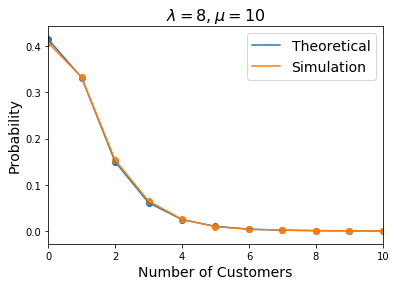

In [4]:
compare_theory_and_simulation(l=8, mu=10, limit=30, max_time=2000, obs_period=(200, 1800));

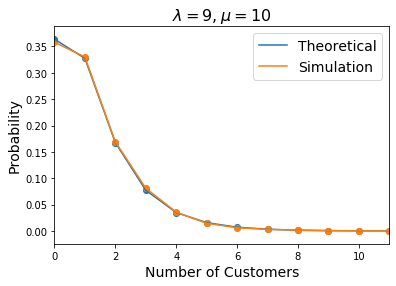

In [5]:
compare_theory_and_simulation(l=9, mu=10, limit=30, max_time=2000, obs_period=(200, 1800));

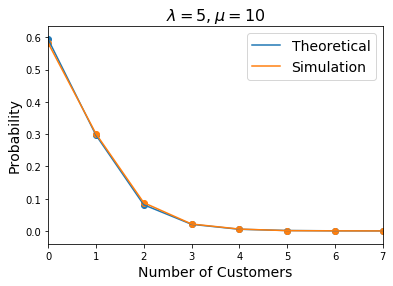

In [6]:
compare_theory_and_simulation(l=5, mu=10, limit=30, max_time=2000, obs_period=(200, 1800));

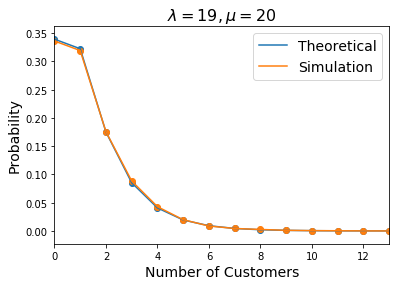

In [7]:
compare_theory_and_simulation(l=19, mu=20, limit=30, max_time=2000, obs_period=(200, 1800));

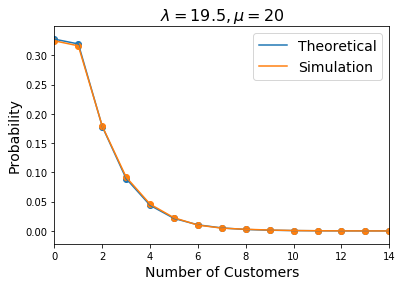

In [8]:
compare_theory_and_simulation(l=19.5, mu=20, limit=30, max_time=2000, obs_period=(200, 1800));

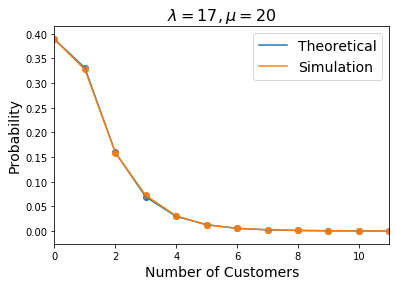

In [9]:
compare_theory_and_simulation(l=17, mu=20, limit=30, max_time=2000, obs_period=(200, 1800));

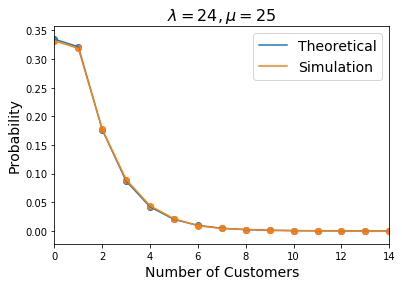

In [10]:
compare_theory_and_simulation(l=24, mu=25, limit=30, max_time=2000, obs_period=(200, 1800));